<a href="https://colab.research.google.com/github/toche7/AI_ITM/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

เอกสารนี้ได้พัฒนาต่อจากงานของคุณ  Sagar sagarmainkar
https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c



โหลด Library ที่ใช้งาน

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

## สร้างข้อมูล

<h5> เราจะสร้างข้อมูลที่มี $\theta_0$ และ $\theta_1$ เป็นค่าตัดแกนและความชันของกราฟ
\begin{equation} \theta_0= 4 \end{equation}
\begin{equation} \theta_1= 3 \end{equation}


In [2]:
theta0 = 4
theta1 = 3

ทำการเพิ่ม noise เข้าไปในข้อมูล

In [3]:
X = 2 * np.random.rand(100,1) # จำลองข้อมูล x จากการสุ่ม
y = theta0 +theta1 * X+np.random.randn(100,1) # สมการเส้นตรง บวกเพิ่มด้วย noise

มาลองพล็อตกราฟกันดู

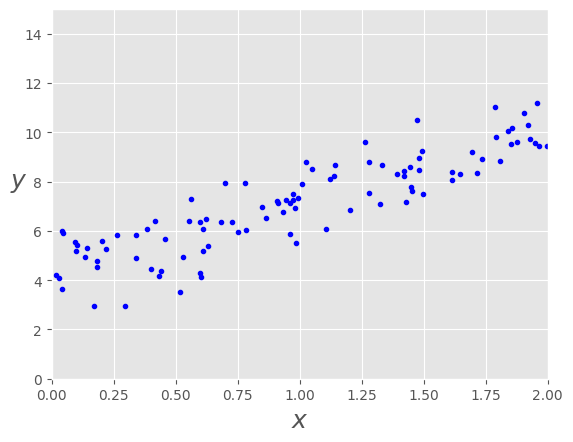

In [4]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

## Gradient Descent

ในส่วนนี้เราจะใช้หลักการฐานของ Gradient Descent ในการหาค่า $\theta_0$ และ $\theta_1$  แทนการใช้การคำนวณทางสถิติ ซึ่งจะทำให้เราได้เห็นการทำงานของ Machine Learning

### Cost Function & Gradients

สมการในการคำนวณ Cost Function และ Gradients เป็นดังต่อไปนี้ โปรดสังเกตุว่า Cost Function มีไว้สำหรับการถดถอยเชิงเส้น สำหรับอัลกอริทึมอื่นๆ Cost Functionจะแตกต่างออกไป และ ส่วน Gradient จะต้องได้มาจาก Cost Function



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

เมื่อค่า $\alpha$ คือ learning rate

In [5]:

def  cal_cost(theta,X,y):
    '''

    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [6]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):

        prediction = np.dot(X,theta)

        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)

    return theta, cost_history, theta_history




มาลองทดสอบการฝึกแบบจำลองด้วย Gradient Descent กันโดยทำการวนรอบจำนวน 1000 รอบและใช้ learning rate ที่ 0.01

In [7]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.098,
Theta1:          3.048
Final cost/MSE:  4118.826


ลองพล็อตกราฟค่า cost history  ที่เกิดขึ้นในแต่ละรอบของทำ Gredient Descent

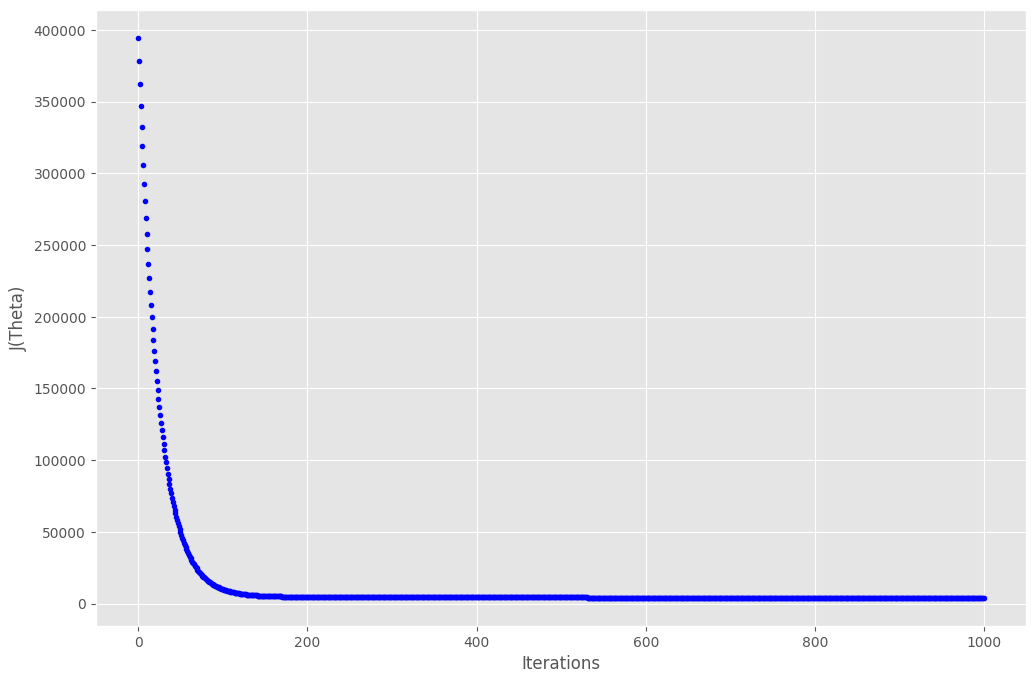

In [8]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

หลังจากการวนซ้ำประมาณ 150 ครั้ง Cost Function จะคงที่ ดังนั้นจึงไม่จำเป็นต้องทำซ้ำที่เหลือหรือจะไม่ส่งผลให้เกิดการปรับให้เหมาะสมใดๆ เพิ่มเติม ดังนั้นเราจะทำการพล็อตแค่ 200 รอบก็เพียงพอ

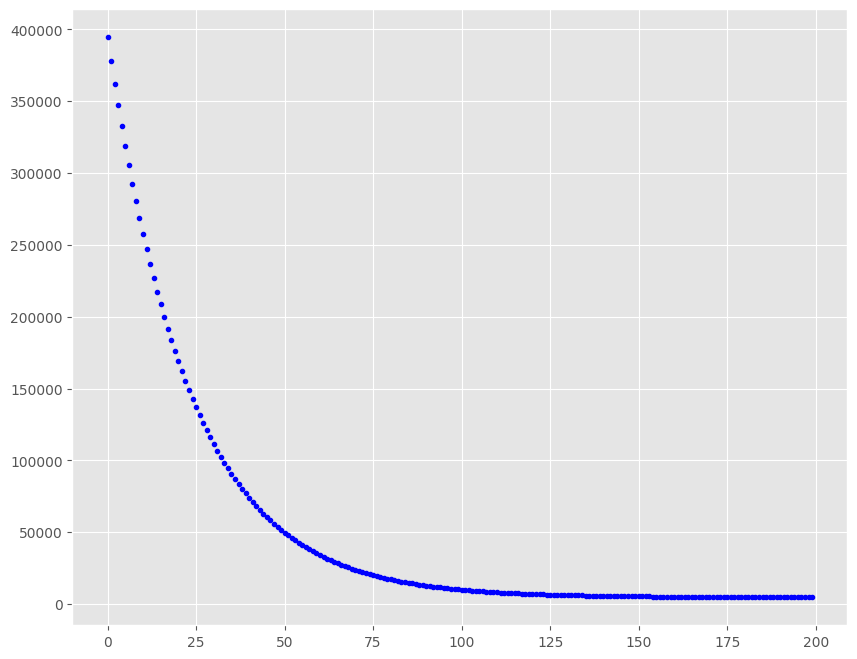

In [9]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

<b> สังเกตุว่าในช่วงแรกๆ ของการทำงานค่า Cost จะลดลงอย่างรวด และจะไม่ค่อยเปลี่ยนแปลงในตอนท้าย

### ผลกระทบของ Learning Rate

เราได้สร้างฟังก์ชันเพื่อในช้ในการพล็อตของจำนวนรอบ (n_inter) และ Learning Rate (lr) เพื่อจะได้สะดวกในการใช้งานต่อไป

In [10]:

def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

พล็อตกราฟสำหรับ  n_iter และ lr ที่แตกต่างกัน

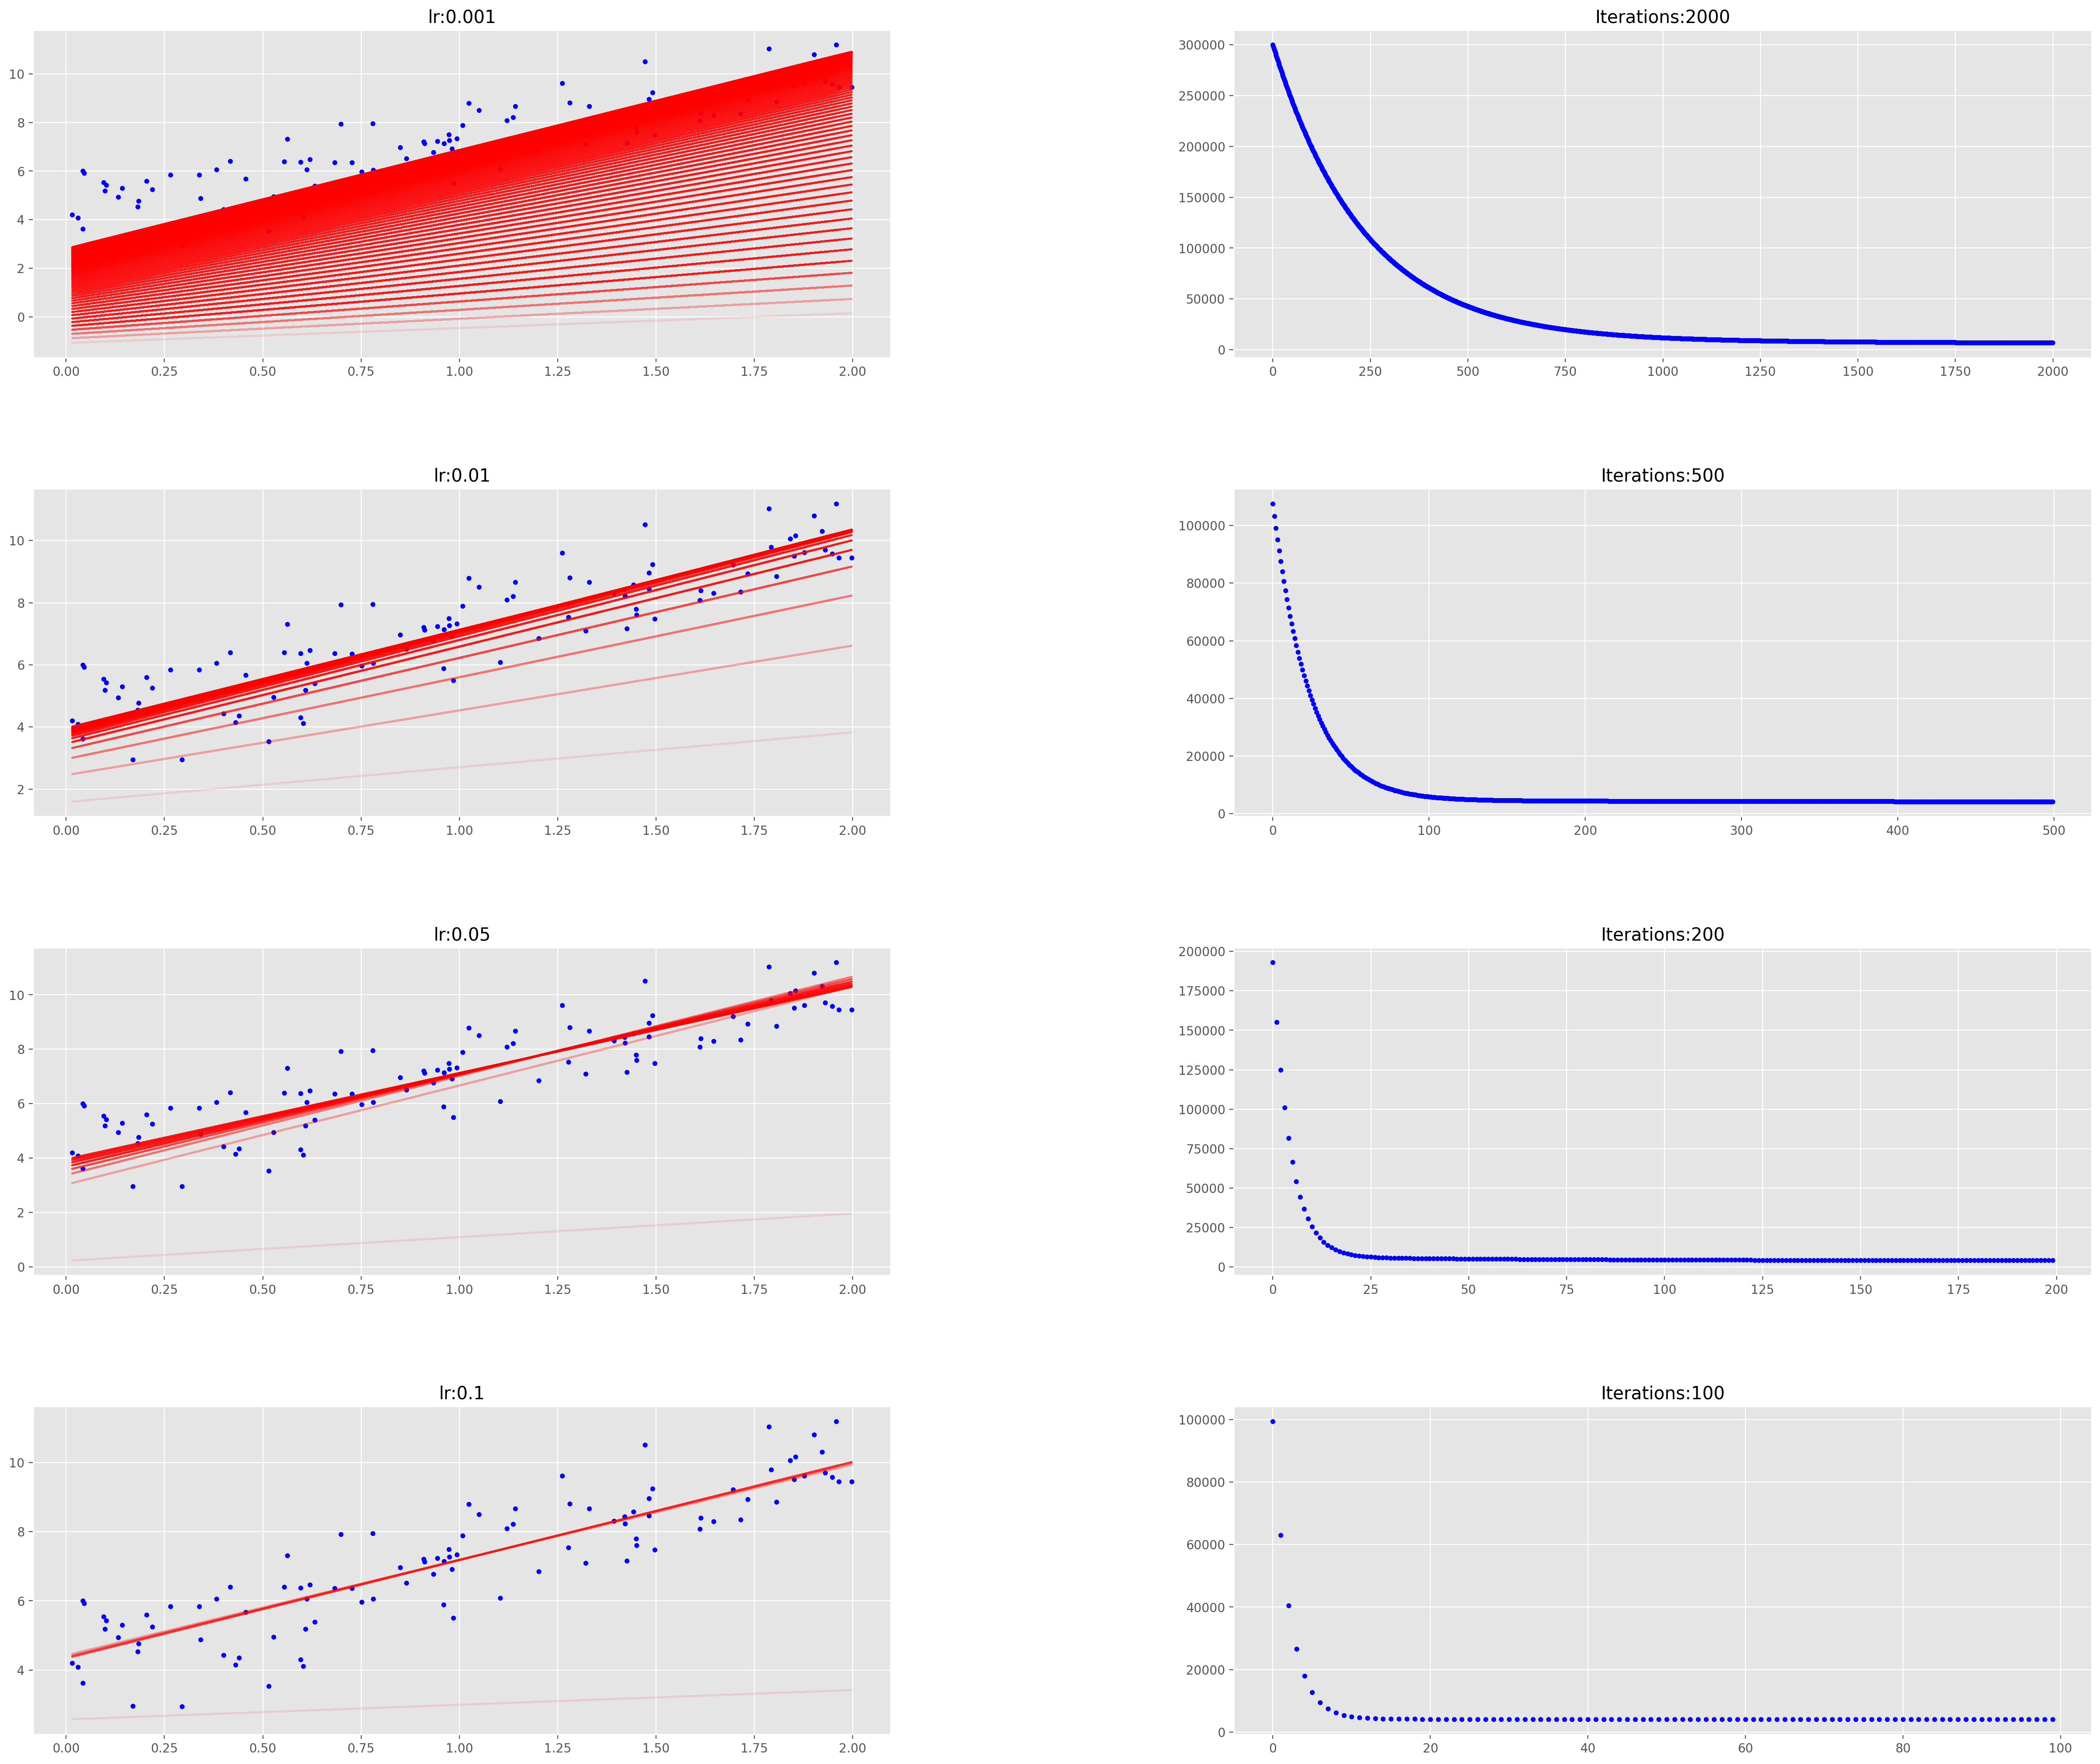

In [11]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)


สังเกตุผลกระทบของค่า lr และ n_iterในการวนรอบ เส้นสีแดงแสดงว่าการไล่ระดับลงเริ่มต้นอย่างไร จากนั้นค่อยๆ เข้าใกล้ค่าสุดท้ายอย่างช้าๆ

เราสามารถแยกพล็อตแต่ละกราฟเพื่อดูรายละเอียดได้

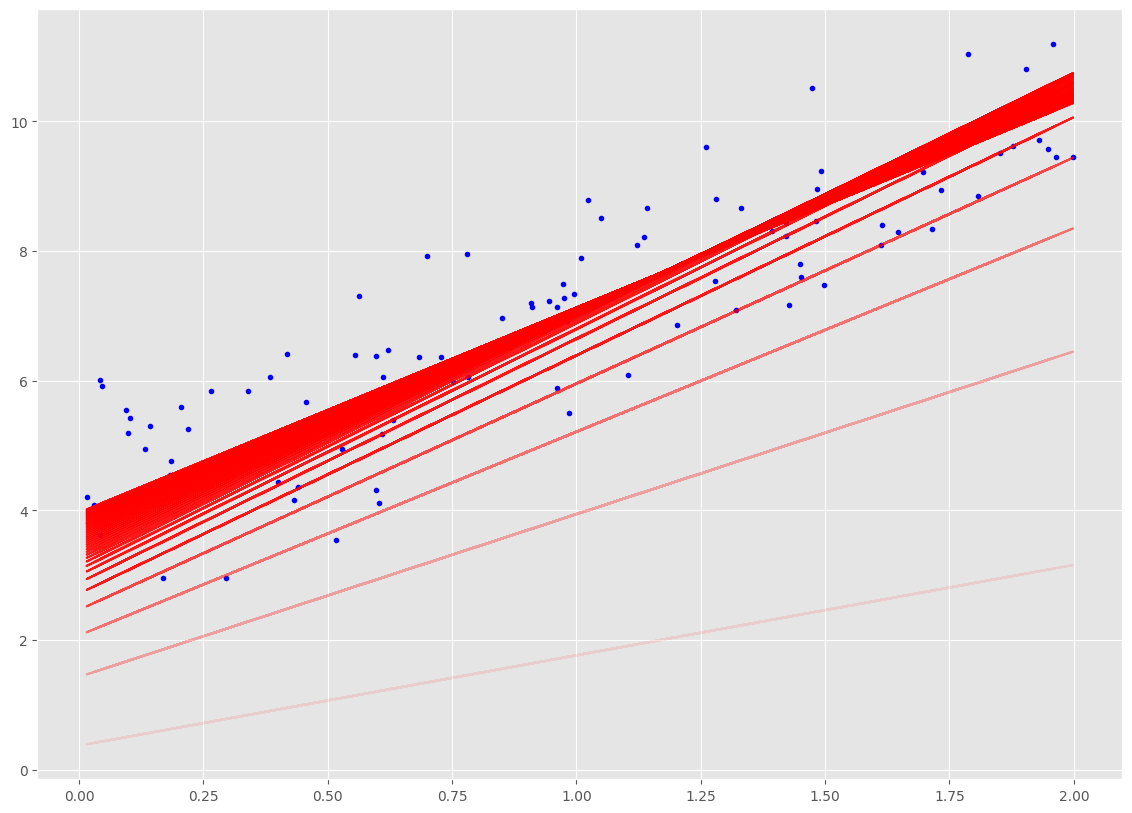

In [12]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(1000,0.01,ax)